In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

test testtt

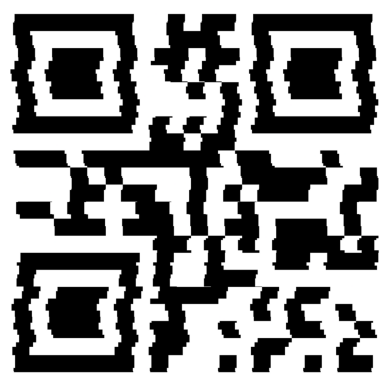

In [3]:
img = cv2.imread("/content/05-Caesar-cipher.png")
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

blur -> binarization -> erosion -> dilation

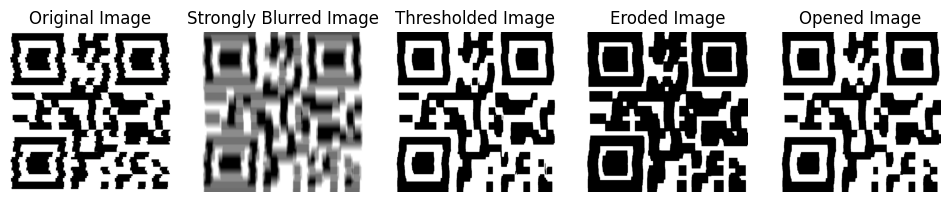

In [4]:



blurred_image = cv2.blur(img, (2,85))

# Apply thresholding (binary threshold) with a higher threshold value
_, thresholded_image = cv2.threshold(blurred_image, 128, 255, cv2.THRESH_BINARY)


kernel = np.ones((20, 20), np.uint8)



eroded_image = cv2.erode(thresholded_image, kernel, iterations=1)
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

# Display the original, blurred, thresholded, and opened images
plt.figure(figsize=(12, 6))

plt.subplot(1, 5, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Strongly Blurred Image")
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(thresholded_image, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(eroded_image, cmap='gray')
plt.title("Eroded Image")
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(dilated_image, cmap='gray')
plt.title("Opened Image")
plt.axis('off')

plt.show()

In [5]:
gray = cv2.cvtColor(dilated_image, cv2.COLOR_BGR2GRAY)
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(gray):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(gray[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = gray.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(gray)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(gray)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = gray.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

0 1012 12 1012


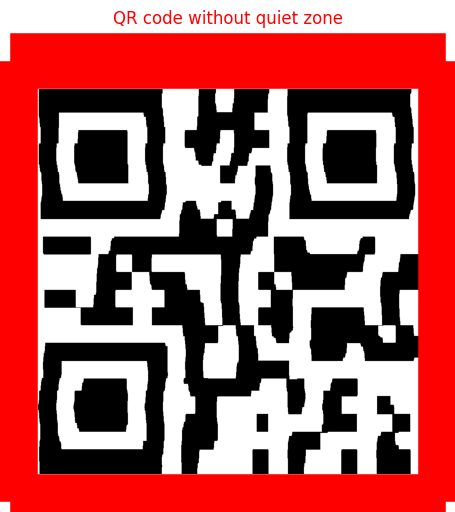

In [6]:

qr_no_quiet_zone = gray[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');



In [7]:
# Define the number of cells
num_cells = 21

# Get the dimensions of the image
height, width = qr_no_quiet_zone.shape

# Calculate the size of each cell
cell_size = min(height // num_cells, width // num_cells)

# Calculate the number of rows and columns of cells
num_rows = height // cell_size
num_cols = width // cell_size

In [8]:

# Initialize an empty array to store the cells
threshold_value = 130
array = []

# Define the size of the averaging mask
mask_size = cell_size // 3

# Define the averaging mask
averaging_mask = np.ones((mask_size, mask_size)) / (mask_size * mask_size)

# Iterate over each cell and extract its content
for y in range(num_rows):
    for x in range(num_cols):
        # Calculate the coordinates of the cell
        x_start = x * cell_size
        y_start = y * cell_size
        x_end = x_start + cell_size
        y_end = y_start + cell_size

        # Extract the cell from the grayscale image
        cell = qr_no_quiet_zone[y_start:y_end, x_start:x_end]

        # Calculate the center coordinates of the cell
        center_x = cell.shape[1] // 2
        center_y = cell.shape[0] // 2

        # Extract the region around the center of the cell
        center_region = cell[center_y - mask_size // 2:center_y + mask_size // 2,
                             center_x - mask_size // 2:center_x + mask_size // 2]

        # Apply averaging mask to the center region
        averaged_value = np.round(np.median(center_region))

        # Determine cell color based on averaged value
        if averaged_value < threshold_value:
            array.append(0)
        else:
            array.append(255)



In [9]:
array_2d = np.array(array).reshape((num_rows, num_cols))
result = array_2d.astype('uint8')
width,height,_=img.shape
def resize_qr(qr_code, new_size):

    qr_image = cv2.resize(qr_code, new_size, interpolation=cv2.INTER_NEAREST)
    return qr_image

resized_qr = resize_qr(result, (width,height))
print(resized_qr.shape)


(1012, 1012)


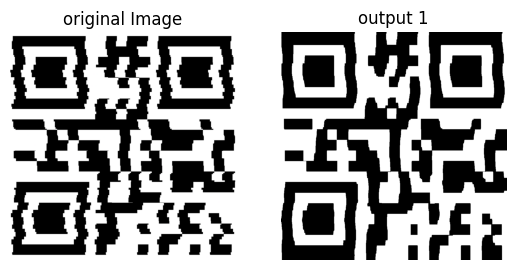

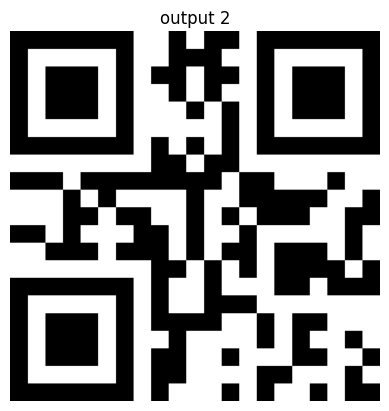

In [10]:


plt.subplot(1,2, 1)
plt.imshow(img, cmap='gray')
plt.title("original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(qr_no_quiet_zone, cmap='gray')
plt.title("output 1")
plt.axis('off')

plt.show()


plt.imshow(resized_qr, cmap='gray')
plt.title("output 2")
plt.axis('off')
plt.show()

